In [2]:
import matplotlib.pyplot as plt
import os

os.chdir('/home/sebastiaan/PhD/Repositories/clusTCR/')

from clustcr.modules.faiss_clustering.src.profile.properties import *
from clustcr.clustering.clustering import Clustering
from clustcr.input import datasets

In [10]:
import re

COMBOS = [
    [BASICITY, HELICITY, HYDROPHOBICITY],
    Z_SCORES,
    [ISOELECTRIC, *Z_SCORES],
    [MUTATION_STABILITY, *Z_SCORES],
    [BASICITY, HELICITY, *Z_SCORES],
    [BASICITY, HELICITY, HYDROPHOBICITY, *Z_SCORES],
    [BASICITY, HELICITY, HYDROPHOBICITY, MUTATION_STABILITY],
    [BASICITY, HELICITY, MUTATION_STABILITY, *Z_SCORES],
    [BASICITY, HELICITY, MUTATION_STABILITY, ISOELECTRIC, *Z_SCORES],
]

mapping = {'basicity':'ba', 'helicity':'he', 
           'hydrophobicity':'hy', 'mutation_stability':'ms'}

rep = dict((re.escape(k), v) for k, v in mapping.items())
pattern = re.compile("|".join(rep.keys()))

for item in combo:
    print(pattern.sub(lambda m: rep[re.escape(m.group(0))], item))

# for combo in COMBOS:
#     print(lambda x: combo)

ba
he
ms
pI
z_scores1
z_scores2
z_scores3


In [12]:
clustering = Clustering(method='faiss', faiss_cluster_size=50)
# clustering.faiss_properties = combo

In [15]:
clustering.faiss_properties = 'anything'

avg size: 1
avg size: 2
avg size: 3
avg size: 4
avg size: 5
avg size: 6
avg size: 7
avg size: 8
avg size: 9
avg size: 10
avg size: 11
avg size: 12
avg size: 13
avg size: 14
avg size: 15
avg size: 16
avg size: 17
avg size: 18
avg size: 19
avg size: 1
avg size: 2
avg size: 3
avg size: 4
avg size: 5
avg size: 6
avg size: 7
avg size: 8
avg size: 9
avg size: 10
avg size: 11
avg size: 12
avg size: 13
avg size: 14
avg size: 15
avg size: 16
avg size: 17
avg size: 18
avg size: 19
avg size: 1
avg size: 2
avg size: 3
avg size: 4
avg size: 5
avg size: 6
avg size: 7
avg size: 8
avg size: 9
avg size: 10
avg size: 11
avg size: 12
avg size: 13
avg size: 14
avg size: 15
avg size: 16
avg size: 17
avg size: 18
avg size: 19
avg size: 1
avg size: 2
avg size: 3
avg size: 4
avg size: 5
avg size: 6
avg size: 7
avg size: 8
avg size: 9
avg size: 10
avg size: 11
avg size: 12
avg size: 13
avg size: 14
avg size: 15
avg size: 16
avg size: 17
avg size: 18
avg size: 19
avg size: 1
avg size: 2
avg size: 3
avg size: 4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


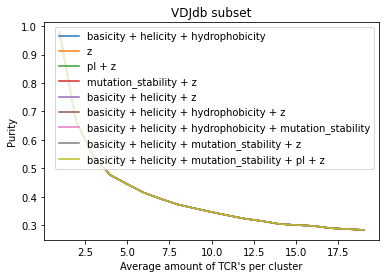

avg size: 1
avg size: 2
avg size: 3
avg size: 4
avg size: 5
avg size: 6
avg size: 7
avg size: 8
avg size: 9
avg size: 10
avg size: 11
avg size: 12
avg size: 13
avg size: 14
avg size: 15
avg size: 16
avg size: 17
avg size: 18
avg size: 19
avg size: 1
avg size: 2
avg size: 3
avg size: 4
avg size: 5
avg size: 6
avg size: 7
avg size: 8
avg size: 9
avg size: 10
avg size: 11
avg size: 12
avg size: 13
avg size: 14
avg size: 15
avg size: 16
avg size: 17
avg size: 18
avg size: 19
avg size: 1
avg size: 2
avg size: 3
avg size: 4
avg size: 5
avg size: 6
avg size: 7
avg size: 8
avg size: 9
avg size: 10
avg size: 11
avg size: 12
avg size: 13
avg size: 14
avg size: 15
avg size: 16
avg size: 17
avg size: 18
avg size: 19
avg size: 1
avg size: 2
avg size: 3
avg size: 4
avg size: 5
avg size: 6
avg size: 7
avg size: 8
avg size: 9
avg size: 10
avg size: 11
avg size: 12
avg size: 13
avg size: 14
avg size: 15
avg size: 16
avg size: 17
avg size: 18
avg size: 19
avg size: 1
avg size: 2
avg size: 3
avg size: 4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


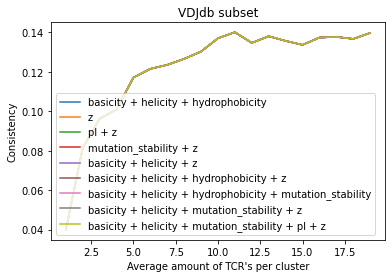

In [11]:

def main():
    cdr3 = datasets.test_cdr3()
    epitopes = datasets.test_epitopes()
    plot_property_measures(cdr3, epitopes, lambda x: x.purity()[0], title='VDJdb subset', y_label='Purity')
    plot_property_measures(cdr3, epitopes, lambda x: x.consistency()[0], title='VDJdb subset', y_label='Consistency')


def plot_property_measures(cdr3, epitopes, metrics_func, title, y_label=''):
    plt.figure()

    COMBOS = [
        [BASICITY, HELICITY, HYDROPHOBICITY],
        Z_SCORES,
        [ISOELECTRIC, *Z_SCORES],
        [MUTATION_STABILITY, *Z_SCORES],
        [BASICITY, HELICITY, *Z_SCORES],
        [BASICITY, HELICITY, HYDROPHOBICITY, *Z_SCORES],
        [BASICITY, HELICITY, HYDROPHOBICITY, MUTATION_STABILITY],
        [BASICITY, HELICITY, MUTATION_STABILITY, *Z_SCORES],
        [BASICITY, HELICITY, MUTATION_STABILITY, ISOELECTRIC, *Z_SCORES],
    ]
    
    mapping = {'basicity':'ba', 'helicity':'he', 
           'hydrophobicity':'hy', 'mutation_stability':'ms'}

    for combo in COMBOS:
        x = []
        y = []
        for i in range(1, 20):
            print('avg size:', i)
            clustering = Clustering(method='faiss', faiss_cluster_size=i)
            clustering.faiss_properties = combo
            result = clustering.fit(cdr3)
            metrics = result.metrics(epitopes)
            x.append(i)
            y.append(metrics_func(metrics))
        atchley_string = ' + '.join(ATCHLEY_FACTORS)
        z_string = ' + '.join(Z_SCORES)
        rep = dict((re.escape(k), v) for k, v in mapping.items())
        pattern = re.compile("|".join(rep.keys()))
        combo_new = []
        for item in combo:
            combo_new.append(pattern.sub(lambda m: rep[re.escape(m.group(0))], item))
        plt.plot(x, y, label=' + '.join(combo_new).replace(atchley_string, 'atchley').replace(z_string, 'z'))

    plt.xlabel("Average amount of TCR's per cluster")
    plt.ylabel(y_label)

    plt.title(title)
    plt.legend(loc='best')
    plt.savefig('results/figures/faiss_vectorization_{}.eps'.format(y_label), format='eps')
    plt.show()


if __name__ == '__main__':
    main()